In [1]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [2]:
df = quandl.get('WIKI/GOOGL', authtoken='wRhCU9heATWRduTXZxnK')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']

In [6]:
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']

In [7]:
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]

In [8]:
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,0.037126,0.003250,44659000.0
2004-08-20,54.322689,0.007109,0.072270,22834300.0
2004-08-23,54.869377,0.037294,-0.012279,18256100.0
2004-08-24,52.597363,0.064175,-0.057264,15247300.0
2004-08-25,53.164113,0.018868,0.011837,9188600.0


In [9]:
forecast_col = 'Adj. Close'

In [10]:
df.fillna(-99999, inplace = True)

In [11]:
forecast_out = int(math.ceil(0.01 * len(df)))

In [12]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [13]:
df.dropna(inplace = True)

In [14]:
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,0.037126,0.003250,44659000.0,69.078238
2004-08-20,54.322689,0.007109,0.072270,22834300.0,67.839414
2004-08-23,54.869377,0.037294,-0.012279,18256100.0,68.912727
2004-08-24,52.597363,0.064175,-0.057264,15247300.0,70.668146
2004-08-25,53.164113,0.018868,0.011837,9188600.0,71.219849


In [15]:
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,0.037126,0.003250,44659000.0,69.078238
2004-08-20,54.322689,0.007109,0.072270,22834300.0,67.839414
2004-08-23,54.869377,0.037294,-0.012279,18256100.0,68.912727
2004-08-24,52.597363,0.064175,-0.057264,15247300.0,70.668146
2004-08-25,53.164113,0.018868,0.011837,9188600.0,71.219849


In [16]:
X = df.drop(columns = 'label')

In [17]:
X

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,0.037126,0.003250,44659000.0
2004-08-20,54.322689,0.007109,0.072270,22834300.0
2004-08-23,54.869377,0.037294,-0.012279,18256100.0
2004-08-24,52.597363,0.064175,-0.057264,15247300.0
2004-08-25,53.164113,0.018868,0.011837,9188600.0
...,...,...,...,...
2018-01-30,1177.370000,0.008969,-0.000297,1792602.0
2018-01-31,1182.220000,0.003468,-0.001343,1643877.0
2018-02-01,1181.590000,0.004959,0.004762,2774967.0


In [18]:
y = df['label']

In [19]:
y

Date
2004-08-19      69.078238
2004-08-20      67.839414
2004-08-23      68.912727
2004-08-24      70.668146
2004-08-25      71.219849
                 ...     
2018-01-30    1094.000000
2018-01-31    1053.150000
2018-02-01    1026.550000
2018-02-02    1054.090000
2018-02-05    1006.940000
Name: label, Length: 3389, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
accuracy = model.score(X_test, y_test)

In [24]:
X = X[:-forecast_out]

In [25]:
X_lately = X[-forecast_out:]

In [26]:
pred_score = model.predict(X_lately)

In [27]:
print(pred_score, accuracy, forecast_out)

[1009.5277875  1011.917896   1009.90612581 1048.25568841 1053.13049305
 1053.232003   1062.92154415 1064.27013592 1071.47181185 1063.12678801
 1074.10025306 1068.95482665 1065.70392676 1061.73592226 1063.32397952
 1057.6888105  1069.37160721 1055.49054285 1055.91612224 1071.83221547
 1073.41049537 1077.95325681 1093.24919647 1082.65288616 1055.55944961
 1056.37831277 1044.49536594 1030.19185461 1037.20771462 1052.30521087
 1065.18512748 1070.08264656 1073.23807443 1068.0389371  1072.63428386] 0.9786164228791179 35


In [28]:
joblib.dump(model, 'wiki_googl.joblib')

['wiki_googl.joblib']

In [29]:
model = joblib.load('wiki_googl.joblib')

In [30]:
predictions = open('wiki_googl.joblib')

In [31]:
print(model)

LinearRegression()


In [32]:
#  

In [33]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [34]:
style.use('fivethirtyeight')

In [35]:
# x = np.array([1,2,3,4,5,6], dtype = float)

In [36]:
# y = np.array([3,6,4,7,8,2], dtype = float)

In [37]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    y = []
    for i in range(hm):
        y1 = val + random.randrange(-variance, variance)
        y.append(y1)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
        
    x = [i for i in range(len(y))]
    return np.array(x, dtype = np.float), np.array(y, dtype = np.float)

In [38]:
#  best fit slope = mean(x)*mean(y) - mean(x*y) / mean(x)**2 - mean(x**2)

In [39]:
def best_fit_slope(x,y):
    m = ( ((mean(x)*mean(y)) - mean(x*y)) /
           (mean(x)**2 - mean(x**2)) )
    return m

In [40]:
m = best_fit_slope(x, y)

NameError: name 'x' is not defined

In [ ]:
m

In [ ]:
# best fit line : b = mean(y) - m(mean(x))

In [ ]:
x

In [ ]:
def best_fit_slope_and_intercept(x,y):
    m = ( ((mean(x)*mean(y)) - mean(x*y)) /
           (mean(x)**2 - mean(x**2)) )
    
    b = (mean(y) - m*mean(x))
    
    return m, b

In [ ]:
x, y = create_dataset(40, 10, 2, correlation = 'pos')

In [ ]:
m, b = best_fit_slope_and_intercept(x,y)

In [ ]:
m,b

In [ ]:
regression_line = [(m*x1)+b for x1 in x]

In [ ]:
plt.scatter(x,y)
plt.plot(x, regression_line)

In [ ]:
# R Squared : r^2 = 1 - RSS / TSS

In [ ]:
def squared_error(y_orig, y_line):
    return sum((y_orig - y_line)**2)

In [ ]:
def coefficient_of_determination(y_orig, y_line):
    y_mean_line = [mean(y_orig) for y1 in y_orig]
    squared_error_regr = squared_error(y_orig, y_line)
    squared_error_y_mean = squared_error(y_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [ ]:
r_squared = coefficient_of_determination(y, regression_line)

In [ ]:
r_squared

In [ ]:
# K - Nearest Neighbors (KNN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [ ]:
df.tail()

In [ ]:
df.replace('?', -99999, inplace = True)

In [ ]:
df.drop('id', 1, inplace = True)

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df

In [ ]:
df.columns

In [ ]:
X = df.drop(columns = 'class')

In [ ]:
X.head()

In [ ]:
y = df['class']

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
model = neighbors.KNeighborsClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy = model.score(X_test, y_test)

In [ ]:
accuracy

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
score = accuracy_score(y_test, predictions)

In [ ]:
score

In [ ]:
example_measure = np.array([4,3,2,1,1,2,3,2,2])

In [ ]:
example_measure = example_measure.reshape(1,-1)

In [ ]:
predictions = model.predict(example_measure)

In [ ]:
predictions

In [ ]:
example_measure = np.array([[4,3,2,1,1,2,3,2,2],[4,1,1,2,2,3,2,1,1]])

In [ ]:
example_measure = example_measure.reshape(len(example_measure),-1)

In [ ]:
predictions = model.predict(example_measure)

In [ ]:
predictions

In [ ]:
# Euclidean Distance

In [ ]:
from math import sqrt

In [ ]:
plot1 = [1,3]
plot2 = [2,5]

In [ ]:
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

In [ ]:
euclidean_distance

In [ ]:
# Creating KNN algorithm

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter

In [ ]:
style.use('fivethirtyeight')

In [ ]:
dataset = {'k':[[1,2],[2,3],[3,1]], 
          'r':[[6,5],[7,7],[8,6]]}

In [ ]:
new_features = [5,7]

In [ ]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=75)

In [ ]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('the number is invalid!')
    distances = []
    
    for group in data:
        for features in data[group]:
            # euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [ ]:
result = k_nearest_neighbors(dataset, new_features, k=3)

In [ ]:
result

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random

In [ ]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('the number is invalid!')
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    # print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [ ]:
df.replace('?', -99999, inplace = True)

In [ ]:
df.drop(['id'], 1, inplace = True)

In [ ]:
full_data = df.astype(float).values.tolist()

In [ ]:
full_data[:10]

In [ ]:
random.shuffle(full_data)

In [ ]:
full_data[:10]

In [ ]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

In [ ]:
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [ ]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1 

In [ ]:
print('Accuracy: ', correct/total)

In [ ]:
# Support Vector Machine(SVM)

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [3]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.replace('?', -99999, inplace=True)

In [5]:
df.drop('id', 1, inplace=True)

/tmp/ipykernel_234117/226681529.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('id', 1, inplace=True)


In [6]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
X = df.drop('class', 1)

/tmp/ipykernel_234117/2444547281.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('class', 1)


In [8]:
X


,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [9]:
y = df['class']

In [10]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
model = svm.SVC()

In [13]:
model.fit(X_train, y_train)

SVC()

In [14]:
accuracy = model.score(X_test, y_test)

In [15]:
accuracy

0.6928571428571428

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
score = accuracy_score(y_test, predictions)

In [19]:
score

0.6928571428571428

In [20]:
example_measure = np.array([4,3,2,1,1,2,3,2,2])

In [21]:
example_measure = example_measure.reshape(1,-1)

In [22]:
prediction = model.predict(example_measure)

/home/miraqulas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
prediction

array([2])

In [24]:
example_measure = np.array([[4,3,2,1,1,2,3,2,2],[4,1,1,2,2,3,2,1,1]])

In [25]:
example_measure = example_measure.reshape(len(example_measure),-1)

In [26]:
predictions = model.predict(example_measure)

/home/miraqulas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
predictions

array([2, 2])

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [29]:
style.use('ggplot')

In [30]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def fit(self, data):
        self.data = data
        
#         { ||w||: [w,b] }
        opt_dict = {}
    
        transforms = [[1,1],
                     [1,-1],
                     [-1,-1],
                     [-1,1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1, 
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001,]
        
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_mutliple), 
                                  self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi) + b >= 1):
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            
                if w[0]<0:
                    optimized = True
                    print('Optimized a step')
                    
                else:
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2
    
    def predict(self, features):
#         self( x.w+b )
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', c = self.colors[classification])
            return classification
        
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
#         hyperplane = x.w+b
#         v = x.w+b
#         psv = 1
#         nsv = -1
#         dec = 0
        def hyperplane(x,w,b,v):
           return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
#         (w.x+b=1)
#         positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])
        
        #         (w.x+b=-1)
#         negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])
        
        #         (w.x+b=0)
#         positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])
        
        plt.show()

In [31]:
data_dict = {-1:np.array([[1,7],
                        [2,8],
                        [3,9]]),
            1:np.array([[5,1],
                      [6,-1],
                      [7,3]])}

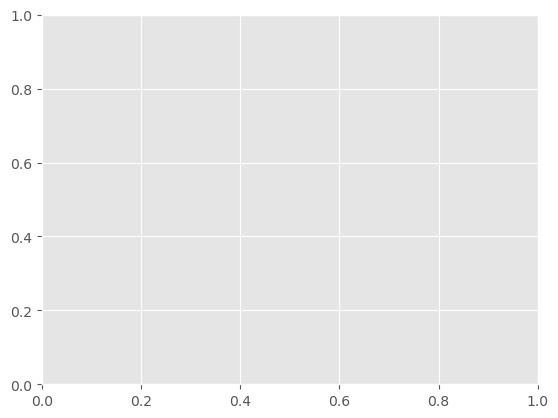

In [32]:
svm = Support_Vector_Machine()